In [6]:
import keras

from keras.datasets import mnist

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# DATA PREPROCESSING

In [9]:
import matplotlib.pyplot as plt

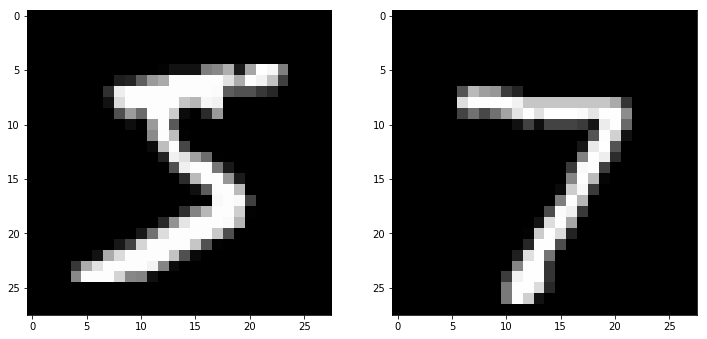

In [10]:
plt.figure(figsize = (12,8))
plt.subplot(121)
plt.imshow(X_train[0], cmap = 'gray')

plt.subplot(122)
plt.imshow(X_test[0], cmap = 'gray')
plt.show()

In [11]:
#Reshape the input data by including the color depth 
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [12]:
#Our input data is in the form of unit8. Convert that into float.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [13]:
#The value of pixels lie between 0 and 255. Divide the pixel values by 255 so that all the pixel values lie between 0
#and 1.
X_train = X_train / 255
X_test = X_test / 255

In [14]:
#Checking total number of classes in the output dataset.
import numpy as np
classes = np.unique(y_train)
n_classes = len(classes)

Now we need to convert the class labels into a one-hot encoding vector. One hot encoding is used to convert categorical data into number vectors because our machine learning model cannot deal with categorical values directly. For example, the above image of handbag belongs to class 9. After applying one hot encoding the output vector for class 9 would be
[0,0,0,0,0,0,0,0,0,1].

In [15]:
from keras.utils import np_utils

y_train_OH = np_utils.to_categorical(y_train)
y_test_OH = np_utils.to_categorical(y_test)
y_train_OH.shape, y_test_OH.shape

((60000, 10), (10000, 10))

# TRAIN TEST SPLIT

splitting our data into two different training and testing datsets is very crucial. Generally we do this so that we can train our model on separate datasets and test our model of separated datasets to find how good has our model generalized. If we use the same datasets for training and testing, our model learns all the labels corresponding to our input features. Even though such model will help us to obtain good accuracy on the training data or the data the model the model has already seen but the model will perform poor on the unknown data, data which it hasn't seen before. This phenomenon is called as Overfitting. We should try to avoid Overfitting by spitting our data into two sets.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_label, y_validate = train_test_split(X_train, y_train_OH, test_size = 0.20, random_state = 101)

In [17]:
#Lets check the shape of the datset after splitting
print("X_train shape after splitting : {}".format(X_train.shape))
print("Shape of input images for Validation after splitting : {}".format(X_validate.shape))
print("y_label shape after splitting : {}".format(y_label.shape))
print("Shape of output labels for Validation after splitting : {}".format(y_validate.shape))

((48000, 28, 28, 1), (12000, 28, 28, 1), (12000, 10), (48000, 10))

In [53]:
#BUILDING THE CONCOLUTIONAL MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [54]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [55]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(lr = 0.01), metrics = ['accuracy'])

In [56]:
history = model.fit(X_train, y_label, 
                    epochs = 25, batch_size = 32, 
                    validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 57s 1ms/step - loss: 0.3293 - acc: 0.8948 - val_loss: 0.2170 - val_acc: 0.9344
Epoch 2/25
48000/48000 [==============================] - 53s 1ms/step - loss: 0.1853 - acc: 0.9445 - val_loss: 0.2383 - val_acc: 0.9340
Epoch 3/25
48000/48000 [==============================] - 54s 1ms/step - loss: 0.1712 - acc: 0.9501 - val_loss: 0.2172 - val_acc: 0.9361
Epoch 4/25
48000/48000 [==============================] - 54s 1ms/step - loss: 0.1688 - acc: 0.9517 - val_loss: 0.2324 - val_acc: 0.9357
Epoch 5/25
48000/48000 [==============================] - 54s 1ms/step - loss: 0.1586 - acc: 0.9553 - val_loss: 0.1644 - val_acc: 0.9522
Epoch 6/25
48000/48000 [==============================] - 54s 1ms/step - loss: 0.1572 - acc: 0.9558 - val_loss: 0.1892 - val_acc: 0.9485
Epoch 7/25
48000/48000 [==============================] - 55s 1ms/step - loss: 0.1503 - acc: 0.9575 - val_loss: 0.1732 - val_acc

In [57]:
model_history = history.history
print(model_history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


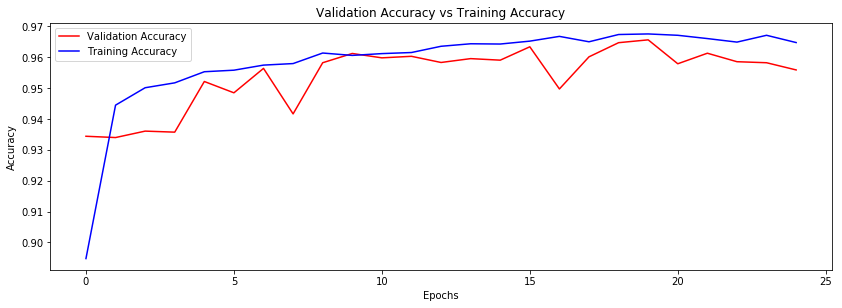

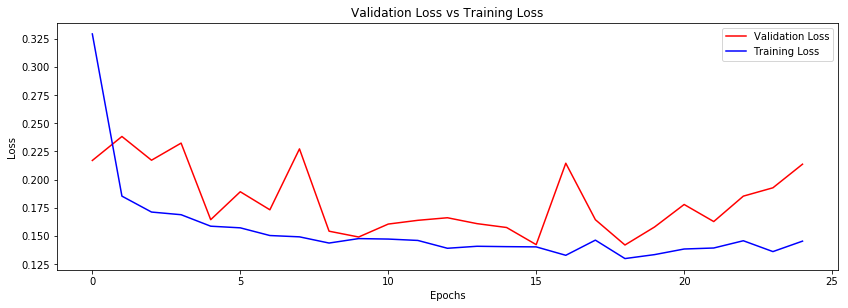

In [60]:
validation_accu = model_history['val_acc']
model_loss = model_history['loss']
validation_loss = model_history['val_loss']
model_accu = model_history['acc']
epochs = range(len(model_accu))

#plot for validation accuracy and Training Accuracy
plt.figure(figsize = (14,10))
plt.subplot(211)
plt.plot(epochs, validation_accu, 'r', label = 'Validation Accuracy')
plt.plot(epochs, model_accu, 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Training Accuracy')
plt.legend()

#plot for validation loss and Training loss
plt.figure(figsize = (14,10))
plt.subplot(212)
plt.plot(epochs, validation_loss, 'r', label = 'Validation Loss')
plt.plot(epochs, model_loss, 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss vs Training Loss')
plt.legend()

plt.show()

You can see lots of spike in the above plots. For validation accuracy vs Training Accuracy plot the accuracy starts to fall after 10 epochs. Same can be said for validation loss vs Training loss plot. The losses start to increase after 10 epochs. This conclude that our model overfit on the dataset.

In [61]:
#evaluate the model on test set

test_eval = model.evaluate(X_test, y_test_OH, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10000/10000 [==============================] - 4s 400us/step
Test loss: 0.19392351079109357
Test accuracy: 0.9586


The accuracy that we got is 96%. Also our model did overfit which is not what we want. So let's see if we can increase the accuracy and avoid overfitting of the model by using some techniques.

# USING DROPOUT TO DEAL WITH OVERFITTING

In [42]:
model_1 = Sequential()

model_1.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.20))

model_1.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.20))

model_1.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.20))

model_1.add(Flatten())

model_1.add(Dense(256, activation = 'relu'))
model_1.add(Dropout(0.20))
model_1.add(Dense(10, activation = 'softmax'))

In [44]:
#compile the model
model_1.compile(loss = 'categorical_crossentropy', 
                optimizer = keras.optimizers.Adadelta(), 
                metrics = ['accuracy'])

In [45]:
history_1 = model_1.fit(X_train, y_label, 
                    epochs = 20, batch_size = 32, 
                    validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 63s 1ms/step - loss: 0.3093 - acc: 0.9010 - val_loss: 0.0824 - val_acc: 0.9758
Epoch 2/20
48000/48000 [==============================] - 62s 1ms/step - loss: 0.1098 - acc: 0.9669 - val_loss: 0.0611 - val_acc: 0.9805
Epoch 3/20
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0864 - acc: 0.9738 - val_loss: 0.0601 - val_acc: 0.9813
Epoch 4/20
48000/48000 [==============================] - 63s 1ms/step - loss: 0.0726 - acc: 0.9779 - val_loss: 0.0504 - val_acc: 0.9841
Epoch 5/20
48000/48000 [==============================] - 62s 1ms/step - loss: 0.0647 - acc: 0.9803 - val_loss: 0.0530 - val_acc: 0.9839
Epoch 6/20
48000/48000 [==============================] - 63s 1ms/step - loss: 0.0594 - acc: 0.9817 - val_loss: 0.0436 - val_acc: 0.9862
Epoch 7/20
48000/48000 [==============================] - 61s 1ms/step - loss: 0.0531 - acc: 0.9837 - val_loss: 0.0444 - val_acc

In [46]:
model_history_1 = history_1.history
print(model_history_1.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


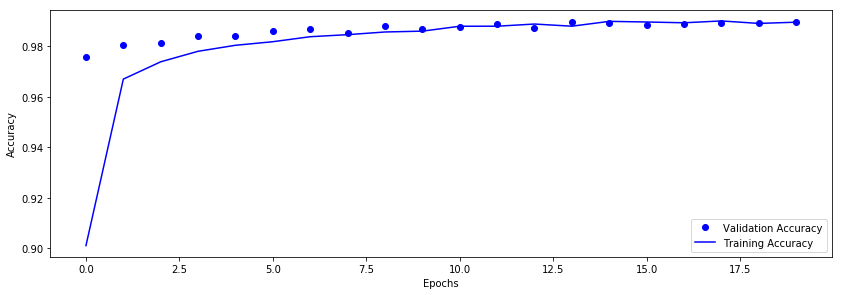

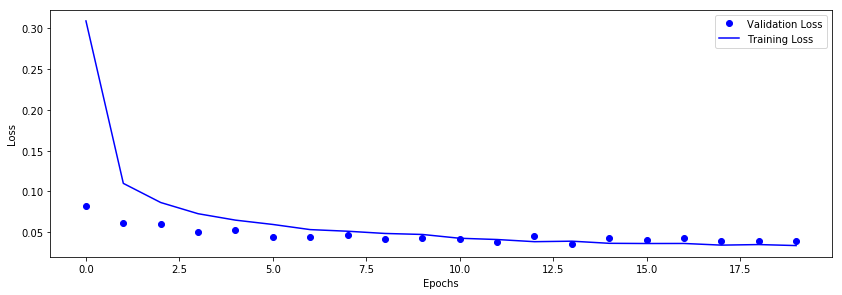

In [49]:
validation_accu_1 = model_history_1['val_acc']
model_loss_1 = model_history_1['loss']
validation_loss_1 = model_history_1['val_loss']
model_accu_1 = model_history_1['acc']
epochs_1 = range(len(model_accu_1))

#plot for validation accuracy and Training Accuracy
plt.figure(figsize = (14,10))
plt.subplot(211)
plt.plot(epochs_1, validation_accu_1, 'bo', label = 'Validation Accuracy')
plt.plot(epochs_1, model_accu_1, 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#plot for validation loss and Training loss
plt.figure(figsize = (14,10))
plt.subplot(212)
plt.plot(epochs_1, validation_loss_1, 'bo', label = 'Validation Loss')
plt.plot(epochs_1, model_loss_1, 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [50]:
#evaluate the model on test set

test_eval_1 = model_1.evaluate(X_test, y_test_OH, verbose=1)

print('Test loss:', test_eval_1[0])
print('Test accuracy:', test_eval_1[1])

10000/10000 [==============================] - 4s 370us/step
Test loss: 0.03742252424157923
Test accuracy: 0.9904


That's great. We got the accuracy of 99.04%. Our model has done really well with the unseen data. So as you can see introducing the dropout method in the model avoids the model from getting ovefit.

# IMAGE DATA AUGMENTATION

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))
model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())

model_2.add(Dense(256, activation = 'relu'))
model_2.add(Dropout(0.30))
model_2.add(Dense(512, activation = 'relu'))
model_2.add(Dropout(0.50))
model_2.add(Dense(10, activation = 'softmax'))

In [19]:
model_2.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [20]:
datagen = ImageDataGenerator(zoom_range=0.2, # randomly zoom into images
                             rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             vertical_flip=False)  # randomly flip images
 
# Fit the model on the batches generated by datagen.flow().
history_2 = model_2.fit_generator(datagen.flow(X_train, y_label, batch_size = 32),
                                epochs = 20,
                                validation_data = (X_validate, y_validate))

Epoch 1/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.9153 - acc: 0.6911 - val_loss: 0.2406 - val_acc: 0.9247
Epoch 2/20
1500/1500 [==============================] - 62s 42ms/step - loss: 0.4387 - acc: 0.8647 - val_loss: 0.1633 - val_acc: 0.9492
Epoch 3/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3546 - acc: 0.8928 - val_loss: 0.1245 - val_acc: 0.9634
Epoch 4/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.3167 - acc: 0.9048 - val_loss: 0.1309 - val_acc: 0.9627
Epoch 5/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2958 - acc: 0.9134 - val_loss: 0.1210 - val_acc: 0.9650
Epoch 6/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2850 - acc: 0.9175 - val_loss: 0.1146 - val_acc: 0.9679
Epoch 7/20
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2746 - acc: 0.9195 - val_loss: 0.1276 - val_acc: 0.9647
Epoch 8/20
1500/1500 [==========================

In [22]:
model_history_2 = history_2.history
print(model_history_2.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


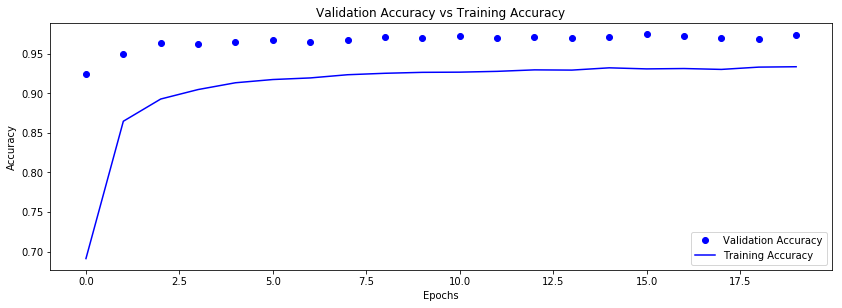

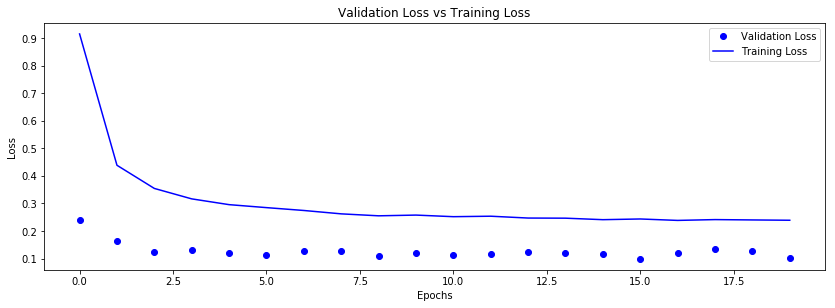

In [39]:
validation_accu_2 = model_history_2['val_acc']
model_loss_2 = model_history_2['loss']
validation_loss_2 = model_history_2['val_loss']
model_accu_2 = model_history_2['acc']
epochs_2 = range(len(model_accu_2))

#plot for validation accuracy and Training Accuracy
plt.figure(figsize = (14,10))
plt.subplot(211)
plt.plot(epochs_2, validation_accu_2, 'bo', label = 'Validation Accuracy')
plt.plot(epochs_2, model_accu_2, 'b', label = 'Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Training Accuracy')
plt.legend()

#plot for validation loss and Training loss
plt.figure(figsize = (14,10))
plt.subplot(212)
plt.plot(epochs_2, validation_loss_2, 'bo', label = 'Validation Loss')
plt.plot(epochs_2, model_loss_2, 'b', label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss vs Training Loss')
plt.legend()

plt.show()

The above two plots give us some good results. For Validation Accuracy vs Training Accuracy plot the accuracy kept on increasing with number of epochs. Also validation accuracy is found greater than Training accuracy, this concludes that our model did not overfit this time. Also the difference between the validation accuracy and training accuracy is about 4-5% which is a good result. This shows that model has done really well on validation dataset and avoided overfitting.

Also the trend in the Validation Loss vs Training Loss plot is decreasing as expected. The loss of validation set was found much lower tham training set. Which means high accuracy.

In [51]:
#evaluate the model on test set

test_eval_2 = model_2.evaluate(X_test, y_test_OH, verbose=1)

print('Test loss:', test_eval_2[0])
print('Test accuracy:', test_eval_2[1])

10000/10000 [==============================] - 4s 393us/step
Test loss: 0.08816792727478732
Test accuracy: 0.9759


Using image data augmentation the accuracy achieved is a bil less but still the model did great and avoided overfitting.